<a href="https://colab.research.google.com/github/thiagodsd/science-avec-des/blob/master/anotacoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# libs

In [106]:
import datetime, warnings, pickle, gc, os, math, pprint, hashlib, functools

import numpy  as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn           as sns

from IPython.display import display

from google.colab import drive, files

In [2]:
# json = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
# !pip install Boruta

     |████████████████████████████████| 61kB 3.2MB/s 


In [4]:
# !pip install -q kaggle
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [5]:
# !kaggle datasets download lgmoneda/cartola-fc-brasil-scouts
# !unzip '*.zip'

  0% 0.00/322k [00:00<?, ?B/s]
100% 322k/322k [00:00<00:00, 48.5MB/s]
Archive:  cartola-fc-brasil-scouts.zip
  inflating: escalacoes.csv          
  inflating: jogadores.csv           
  inflating: jogos.csv               


# tabelas

In [6]:
for d in ['escalacoes', 'jogadores', 'jogos']:
  with pd.option_context('display.max_rows', 5, 'display.max_columns', None): 
      _df = pd.read_csv(rf'{d}.csv')
      print(d)
      display(_df)

escalacoes


,colocação,jogador,escalações,rodada,ano
0,1,Gabriel (FLA),3327349,1,2020
1,2,Pedro Geromel (GRE),3127228,1,2020
...,...,...,...,...,...
1118,19,Guarín (VAS),557526,38,2019
1119,20,Jorge Jesus (FLA),524641,38,2019


jogadores


,Nome,Clube,Preço,J,Média,Últ. Pont.,Variação,DS,G,A,SG,FS,FF,FD,FT,DD,DP,GC,CV,CA,PP,GS,FC,I,PI,rodada,ano,RB,PE
0,Elton (ATA),Sport,14.21,1,15.60,15.6,10.21,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,4.0,1,2020,NaN,NaN
1,Saravia (LAT),Internacional,13.19,1,12.20,12.2,7.19,8.0,NaN,NaN,1.0,3.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,3.0,NaN,8.0,1,2020,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12294,Wesley (MEI),Avaí,1.69,10,-0.51,2.9,0.41,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,11.0,1.0,NaN,38,2019,7.0,15.0
12295,Phelipe (GOL),Grêmio,0.78,2,-0.65,-3.3,-0.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,38,2019,NaN,1.0


jogos


,mandante,visitante,placar_mandante,placar_visitante,data,local,rodada,ano
0,Fortaleza,Athlético-PR,0.0,2.0,"SÁB, 08/08 19:00",Castelão (CE),1,2020
1,Coritiba,Internacional,0.0,1.0,"SÁB, 08/08 19:30",Couto Pereira,1,2020
...,...,...,...,...,...,...,...,...
558,Goiás,Grêmio,3.0,2.0,"DOM, 08/12 16:00",Serra Dourada,38,2019
559,CSA,São Paulo,1.0,2.0,"DOM, 08/12 16:00",Rei Pelé,38,2019


In [7]:
df = pd.read_csv('jogadores.csv')

# df = df[df['ano'].isin([2020])]
df = df[df['rodada']>7]

df['id']  = df['Nome'].apply( lambda x: hashlib.sha1(str.encode(x)).hexdigest() )
df['pos'] = df['Nome'].apply( lambda x: x.split('(')[-1].split(')')[0].strip() )

df[['Nome', 'id', 'pos']]

,Nome,id,pos
1544,Marinho (ATA),79471fa35f3143ed842e45095f0f50314476b2a9,ATA
1545,Thiago Galhardo (MEI),d7cf1f1ebda261e1c21956a488ece0e62e519435,MEI
1546,Saravia (LAT),09a1951987d2f8dd0c99f3faad7d03d07af8873d,LAT
1547,João Paulo (GOL),eecc56b868165d01bf2a7db97c41e2ed358e2e6b,GOL
1548,Arrascaeta (MEI),a0fce35353de77b52ad41ac388bf917a1cae2b77,MEI
...,...,...,...
12291,Lucas Hernández (LAT),14f33434489bd23622b395e431e4661597182291,LAT
12292,Luccas Claro (ZAG),dc087e601838e0fcb99b470960ae8ec1a254c9e4,ZAG
12293,Helinho (ATA),5312766b3b17ef133c535874609315240162e5e0,ATA
12294,Wesley (MEI),a54d28bd16bab84b30ecead11c1ce39402aa49c6,MEI


In [8]:
df.iloc[-51]

Nome                                         Léo (ZAG)
Clube                                         Cruzeiro
Preço                                             6.09
J                                                   18
Média                                             1.78
Últ. Pont.                                         1.5
Variação                                         -0.42
DS                                                 NaN
G                                                  NaN
A                                                  NaN
SG                                                   3
FS                                                   6
FF                                                   1
FD                                                   1
FT                                                 NaN
DD                                                 NaN
DP                                                 NaN
GC                                                 NaN
CV        

# modelos

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import normalize, StandardScaler
from sklearn.metrics         import classification_report, roc_curve, auc,accuracy_score, confusion_matrix, f1_score, fbeta_score
from sklearn.calibration     import CalibratedClassifierCV, calibration_curve
from boruta                  import BorutaPy

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble     import RandomForestClassifier
import lightgbm as lgb         

## regressão logística binária

In [35]:
train_x = df[['Preço', 'Média','Variação','DS','G','A','SG','FS','FF','FD','FT','DD','DP','GC','CV','CA','PP','GS','FC','I','PI','RB','PE']].fillna(0.0)
train_y = np.where(df['pos']=='ATA', True, False)

_cols = train_x.columns.to_list()
# train_x = pd.DataFrame(StandardScaler().fit_transform(train_x[_cols]), columns=_cols)
train_x = pd.DataFrame(normalize(train_x[_cols]), columns=_cols)

In [36]:
X_train, X_holdout, y_train, y_holdout = train_test_split(train_x, train_y, test_size = 0.2, random_state = 37)

In [37]:
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=1, random_state=1, max_iter=23)

feat_selector.fit(X_train.values, y_train)

Iteration: 1 / 23
Iteration: 2 / 23
Iteration: 3 / 23
Iteration: 4 / 23
Iteration: 5 / 23
Iteration: 6 / 23
Iteration: 7 / 23
Iteration: 8 / 23
Iteration: 9 / 23
Iteration: 10 / 23
Iteration: 11 / 23
Iteration: 12 / 23
Iteration: 13 / 23
Iteration: 14 / 23
Iteration: 15 / 23
Iteration: 16 / 23
Iteration: 17 / 23
Iteration: 18 / 23
Iteration: 19 / 23
Iteration: 20 / 23
Iteration: 21 / 23
Iteration: 22 / 23


BorutaPy finished running.

Iteration: 	23 / 23
Confirmed: 	21
Tentative: 	0
Rejected: 	1


BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight='balanced',
                                          criterion='gini', max_depth=5,
                                          max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=132, n_jobs=-1,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x7F029538D570,
                                          verbose=0, warm_start=

In [38]:
pd.concat( [X_train.columns.to_frame().reset_index()['index'], pd.DataFrame(feat_selector.ranking_)], axis=1).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
index,Preço,Média,Variação,DS,G,A,SG,FS,FF,FD,FT,DD,DP,GC,CV,CA,PP,GS,FC,I,PI,RB,PE
0,1,1,1,1,1,1,1,1,1,1,1,1,2,1,2,1,1,1,1,1,1,1,1


In [39]:
_cols = X_train.columns[ feat_selector.support_]
clf = LogisticRegression(random_state=0).fit(X_train[_cols], y_train)

y_pred_holdout = clf.predict(X_holdout[_cols])
print( classification_report(y_holdout, y_pred_holdout, target_names=['False', 'True']) )

              precision    recall  f1-score   support

       False       0.92      0.97      0.95      1501
        True       0.84      0.64      0.73       343

    accuracy                           0.91      1844
   macro avg       0.88      0.81      0.84      1844
weighted avg       0.91      0.91      0.91      1844



In [40]:
pd.concat( [pd.DataFrame(_cols), 
            pd.DataFrame(clf.coef_).T], axis=1)

,0,0
0,Preço,1.953021
1,Média,0.135339
2,Variação,0.309432
3,DS,-3.730350
4,G,5.965869
5,A,2.154152
6,SG,-7.123393
7,FS,4.585971
8,FF,5.230703
9,FD,4.042832


## lightgbm & optuna & calibragem

In [112]:
def lgb_opt(X_train_all, Y_train_all, trial):
  (X_train, X_holdout, y_train, y_holdout) = train_test_split(X_train_all, Y_train_all, test_size=0.2, random_state=0)

  bagging_freq            = trial.suggest_int('bagging_freq',1,10),
  min_data_in_leaf        = trial.suggest_int('min_data_in_leaf',2,100),
  max_depth               = trial.suggest_int('max_depth',1,20),
  learning_rate           = trial.suggest_loguniform('learning_rate',0.001,0.1),
  num_leaves              = trial.suggest_int('num_leaves',2,70),
  num_threads             = trial.suggest_int('num_threads',1,10),
  min_sum_hessian_in_leaf = trial.suggest_int('min_sum_hessian_in_leaf',1,10)
  lambda_l1               = trial.suggest_loguniform('lambda_l1', 0.1, 2),
  lambda_l2               = trial.suggest_loguniform('lambda_l2', 0.1, 2)

  lightgbm_tuna = lgb.LGBMClassifier(
                                    random_state = 31,
                                    verbosity    = 1,
                                    bagging_seed = 13,
                                    boost_from_average = 'true',
                                    boost              = 'gbdt',
                                    metric             = 'auc',
                                    bagging_freq            = bagging_freq ,
                                    min_data_in_leaf        = min_data_in_leaf,
                                    max_depth               = max_depth,
                                    learning_rate           = learning_rate,
                                    num_leaves              = num_leaves,
                                    num_threads             = num_threads,
                                    min_sum_hessian_in_leaf = min_sum_hessian_in_leaf,
                                    lambda_l1               = lambda_l1,
                                    lambda_l2               = lambda_l2
                                    )

  lightgbm_tuna.fit(X_train, y_train)

  y_pred_train   = lightgbm_tuna.predict(X_train)
  y_pred_holdout = lightgbm_tuna.predict(X_holdout)

  acc_t = accuracy_score( y_train , y_pred_train )
  acc_h = accuracy_score( y_holdout , y_pred_holdout )
  delta = acc_t-acc_h

  # return accuracy_score(y_holdout, y_pred_holdout)
  # return 1/delta
  return fbeta_score(y_holdout, y_pred_holdout, beta=2.0)

In [113]:
lb_study = optuna.create_study(direction='maximize')
lb_study.optimize(functools.partial(lgb_opt, X_train[_cols], y_train), n_trials = 23)

print(lb_study.best_trial)
print(lb_study.best_params)

[I 2020-11-14 21:13:39,807] A new study created in memory with name: no-name-9eb28b5d-95ee-435a-bacf-50a32c39ee60
[I 2020-11-14 21:13:40,887] Trial 0 finished with value: 0.4311039484286866 and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 22, 'max_depth': 6, 'learning_rate': 0.006733887103514793, 'num_leaves': 68, 'num_threads': 7, 'min_sum_hessian_in_leaf': 10, 'lambda_l1': 0.3161063091110503, 'lambda_l2': 0.4757480955807508}. Best is trial 0 with value: 0.4311039484286866.
[I 2020-11-14 21:13:41,206] Trial 1 finished with value: 0.7961095100864553 and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 86, 'max_depth': 11, 'learning_rate': 0.040845522448767685, 'num_leaves': 41, 'num_threads': 2, 'min_sum_hessian_in_leaf': 1, 'lambda_l1': 1.6043994261780137, 'lambda_l2': 0.15741231509246242}. Best is trial 1 with value: 0.7961095100864553.
[I 2020-11-14 21:13:42,094] Trial 2 finished with value: 0.0 and parameters: {'bagging_freq': 7, 'min_data_in_leaf': 22, 'max_depth': 8, 'l

FrozenTrial(number=21, value=0.8506819813352475, datetime_start=datetime.datetime(2020, 11, 14, 21, 13, 57, 873567), datetime_complete=datetime.datetime(2020, 11, 14, 21, 13, 59, 282355), params={'bagging_freq': 5, 'min_data_in_leaf': 38, 'max_depth': 20, 'learning_rate': 0.065923960937246, 'num_leaves': 31, 'num_threads': 7, 'min_sum_hessian_in_leaf': 2, 'lambda_l1': 0.10087693137095519, 'lambda_l2': 1.2301481176225773}, distributions={'bagging_freq': IntUniformDistribution(high=10, low=1, step=1), 'min_data_in_leaf': IntUniformDistribution(high=100, low=2, step=1), 'max_depth': IntUniformDistribution(high=20, low=1, step=1), 'learning_rate': LogUniformDistribution(high=0.1, low=0.001), 'num_leaves': IntUniformDistribution(high=70, low=2, step=1), 'num_threads': IntUniformDistribution(high=10, low=1, step=1), 'min_sum_hessian_in_leaf': IntUniformDistribution(high=10, low=1, step=1), 'lambda_l1': LogUniformDistribution(high=2, low=0.1), 'lambda_l2': LogUniformDistribution(high=2, low=0

              precision    recall  f1-score   support

       False       0.92      0.97      0.95      1501
        True       0.84      0.64      0.73       343

    accuracy                           0.91      1844
   macro avg       0.88      0.81      0.84      1844
weighted avg       0.91      0.91      0.91      1844

              precision    recall  f1-score   support

       False       0.98      0.98      0.98      1501
        True       0.92      0.90      0.91       343

    accuracy                           0.97      1844
   macro avg       0.95      0.94      0.95      1844
weighted avg       0.97      0.97      0.97      1844

              precision    recall  f1-score   support

       False       0.98      0.98      0.98      1501
        True       0.93      0.90      0.91       343

    accuracy                           0.97      1844
   macro avg       0.95      0.94      0.95      1844
weighted avg       0.97      0.97      0.97      1844



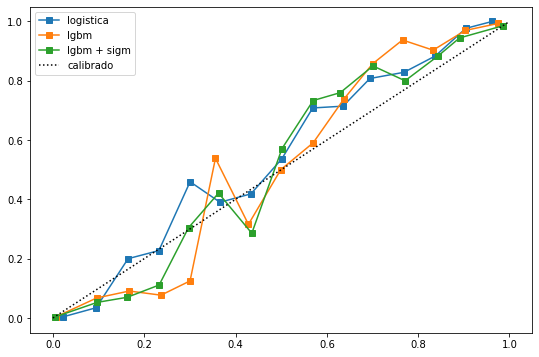

In [114]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(9,6))

# logistica
clf = LogisticRegression(random_state=0).fit(X_train[_cols], y_train)
y_pred_holdout      = clf.predict(X_holdout[_cols])
y_pred_holdout_prob = clf.predict_proba(X_holdout[_cols])
fraction_of_positives, mean_predicted_value = calibration_curve(y_holdout, y_pred_holdout_prob[:,1], n_bins=15)
print( classification_report(y_holdout, y_pred_holdout, target_names=['False', 'True']) )
ax1.plot(mean_predicted_value, fraction_of_positives, "s-", label="logistica")

# boosting
lgbm =  lgb.LGBMClassifier(**lb_study.best_params)
lgbm.fit(X_train[_cols], y_train)
y_pred_holdout      = lgbm.predict(X_holdout[_cols])
y_pred_holdout_prob = lgbm.predict_proba(X_holdout[_cols])
fraction_of_positives, mean_predicted_value = calibration_curve(y_holdout, y_pred_holdout_prob[:,1], n_bins=15)
print( classification_report(y_holdout, y_pred_holdout, target_names=['False', 'True']) )
ax1.plot(mean_predicted_value, fraction_of_positives, "s-", label="lgbm")

# calibration
clf_sigmoid = CalibratedClassifierCV(lgbm, cv=3, method='isotonic')
clf_sigmoid.fit(X_train[_cols], y_train)
y_pred_holdout      = clf_sigmoid.predict(X_holdout[_cols])
y_pred_holdout_prob = clf_sigmoid.predict_proba(X_holdout[_cols])
fraction_of_positives, mean_predicted_value = calibration_curve(y_holdout, y_pred_holdout_prob[:,1], n_bins=15)
print( classification_report(y_holdout, y_pred_holdout, target_names=['False', 'True']) )
ax1.plot(mean_predicted_value, fraction_of_positives, "s-", label="lgbm + sigm")

ax1.plot([0, 1], [0, 1], "k:", label="calibrado")
plt.legend()
plt.show()

## regressão logística multi-classe

In [115]:
train_x = df[['Preço', 'Média','Variação','DS','G','A','SG','FS','FF','FD','FT','DD','DP','GC','CV','CA','PP','GS','FC','I','PI','RB','PE']].fillna(0.0)
train_y = df['pos']#np.where(df['pos']=='ATA', True, False)

_cols = train_x.columns.to_list()
# train_x = pd.DataFrame(StandardScaler().fit_transform(train_x[_cols]), columns=_cols)
train_x = pd.DataFrame(normalize(train_x[_cols]), columns=_cols)

In [116]:
X_train, X_holdout, y_train, y_holdout = train_test_split(train_x, train_y, stratify=train_y, test_size = 0.2, random_state = 37)

In [117]:
display(pd.DataFrame(y_train)['pos'].value_counts(normalize=True))
display(pd.DataFrame(y_holdout)['pos'].value_counts(normalize=True))

MEI    0.312000
ATA    0.188339
ZAG    0.169220
LAT    0.158102
TEC    0.086508
GOL    0.085831
Name: pos, dtype: float64

MEI    0.311822
ATA    0.188720
ZAG    0.169197
LAT    0.158351
TEC    0.086226
GOL    0.085683
Name: pos, dtype: float64

In [118]:
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=1, random_state=1, max_iter=23)

feat_selector.fit(X_train.values, y_train)

Iteration: 1 / 23
Iteration: 2 / 23
Iteration: 3 / 23
Iteration: 4 / 23
Iteration: 5 / 23
Iteration: 6 / 23
Iteration: 7 / 23
Iteration: 8 / 23
Iteration: 9 / 23
Iteration: 10 / 23
Iteration: 11 / 23
Iteration: 12 / 23
Iteration: 13 / 23
Iteration: 14 / 23
Iteration: 15 / 23
Iteration: 16 / 23
Iteration: 17 / 23
Iteration: 18 / 23
Iteration: 19 / 23


BorutaPy finished running.

Iteration: 	20 / 23
Confirmed: 	23
Tentative: 	0
Rejected: 	0


BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight='balanced',
                                          criterion='gini', max_depth=5,
                                          max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=135, n_jobs=-1,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x7F0288A9E570,
                                          verbose=0, warm_start=

In [119]:
pd.concat( [X_train.columns.to_frame().reset_index()['index'], pd.DataFrame(feat_selector.ranking_)], axis=1).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
index,Preço,Média,Variação,DS,G,A,SG,FS,FF,FD,FT,DD,DP,GC,CV,CA,PP,GS,FC,I,PI,RB,PE
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [120]:
_cols = X_train.columns[ feat_selector.support_]
clf = LogisticRegression(random_state=0).fit(X_train[_cols], y_train)

y_pred_holdout = clf.predict(X_holdout[_cols])
print( classification_report(y_holdout, y_pred_holdout, target_names=sorted(y_holdout.unique())) )

              precision    recall  f1-score   support

         ATA       0.75      0.68      0.72       348
         GOL       1.00      0.96      0.98       158
         LAT       0.71      0.54      0.62       292
         MEI       0.72      0.86      0.79       575
         TEC       0.89      1.00      0.94       159
         ZAG       0.73      0.68      0.70       312

    accuracy                           0.77      1844
   macro avg       0.80      0.79      0.79      1844
weighted avg       0.77      0.77      0.76      1844



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [121]:
_coefs = pd.concat( [pd.DataFrame(_cols), 
            pd.DataFrame(clf.coef_).T], axis=1)
_coefs.columns = _coefs.columns[:-6].to_list() + sorted(y_holdout.unique())
_coefs

,0,ATA,GOL,LAT,MEI,TEC,ZAG
0,Preço,-0.278003,-1.176171,-1.543337,-2.155060,5.023617,0.128955
1,Média,-0.734285,-1.238613,0.989994,-1.749860,3.739687,-1.006923
2,Variação,0.335143,-0.134636,-0.127180,0.386366,0.025014,-0.484707
3,DS,-2.106726,-4.760869,0.447867,3.857282,-0.514344,3.076791
4,G,4.992768,-0.463016,-4.575783,-0.513464,-0.463444,1.022939
5,A,1.885278,-0.330126,3.485229,0.122697,-0.267562,-4.895516
6,SG,-6.887074,1.974240,9.296098,-18.432989,-1.362341,15.412066
7,FS,4.775896,-3.034522,0.714315,1.905535,-2.771111,-1.590113
8,FF,5.995269,-1.921652,-3.941561,2.023937,-1.492529,-0.663465
9,FD,4.843438,-1.185683,-1.921749,2.775535,-1.357979,-3.153563


In [122]:
gc.collect()

30211

## lightgbm & optuna & calibragem

In [129]:
def lgb_opt(X_train_all, Y_train_all, trial):
  (X_train, X_holdout, y_train, y_holdout) = train_test_split(X_train_all, Y_train_all, test_size=0.2, random_state=0)

  bagging_freq            = trial.suggest_int('bagging_freq',1,10),
  min_data_in_leaf        = trial.suggest_int('min_data_in_leaf',2,100),
  max_depth               = trial.suggest_int('max_depth',1,20),
  learning_rate           = trial.suggest_loguniform('learning_rate',0.001,0.1),
  num_leaves              = trial.suggest_int('num_leaves',2,70),
  num_threads             = trial.suggest_int('num_threads',1,10),
  min_sum_hessian_in_leaf = trial.suggest_int('min_sum_hessian_in_leaf',1,10)
  lambda_l1               = trial.suggest_loguniform('lambda_l1', 0.1, 2),
  lambda_l2               = trial.suggest_loguniform('lambda_l2', 0.1, 2)

  lightgbm_tuna = lgb.LGBMClassifier(
                                    random_state = 31,
                                    verbosity    = 1,
                                    bagging_seed = 13,
                                    boost_from_average = 'true',
                                    boost              = 'gbdt',
                                    metric             = 'multi_logloss',
                                    bagging_freq            = bagging_freq ,
                                    min_data_in_leaf        = min_data_in_leaf,
                                    max_depth               = max_depth,
                                    learning_rate           = learning_rate,
                                    num_leaves              = num_leaves,
                                    num_threads             = num_threads,
                                    min_sum_hessian_in_leaf = min_sum_hessian_in_leaf,
                                    lambda_l1               = lambda_l1,
                                    lambda_l2               = lambda_l2
                                    )

  lightgbm_tuna.fit(X_train, y_train)

  y_pred_train   = lightgbm_tuna.predict(X_train)
  y_pred_holdout = lightgbm_tuna.predict(X_holdout)

  acc_t = accuracy_score( y_train , y_pred_train )
  acc_h = accuracy_score( y_holdout , y_pred_holdout )
  delta = acc_t-acc_h

  # return accuracy_score(y_holdout, y_pred_holdout)
  # return 1/delta
  return fbeta_score(y_holdout, y_pred_holdout, beta=2.0, average="macro")

In [130]:
lb_study = optuna.create_study(direction='maximize')
lb_study.optimize(functools.partial(lgb_opt, X_train[_cols], y_train), n_trials = 23)

print(lb_study.best_trial)
print(lb_study.best_params)

[I 2020-11-14 21:23:58,585] A new study created in memory with name: no-name-4a9939c5-f944-4cdc-a7da-6c7e1959749b
[I 2020-11-14 21:24:01,325] Trial 0 finished with value: 0.8033437578974055 and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 91, 'max_depth': 10, 'learning_rate': 0.0048314193098557305, 'num_leaves': 63, 'num_threads': 3, 'min_sum_hessian_in_leaf': 7, 'lambda_l1': 0.6827974891830152, 'lambda_l2': 0.1323355638019082}. Best is trial 0 with value: 0.8033437578974055.
[I 2020-11-14 21:24:02,353] Trial 1 finished with value: 0.8004448467576474 and parameters: {'bagging_freq': 8, 'min_data_in_leaf': 36, 'max_depth': 2, 'learning_rate': 0.02062118963215979, 'num_leaves': 17, 'num_threads': 3, 'min_sum_hessian_in_leaf': 3, 'lambda_l1': 1.6012101689223446, 'lambda_l2': 1.606539263788929}. Best is trial 0 with value: 0.8033437578974055.
[I 2020-11-14 21:24:06,673] Trial 2 finished with value: 0.9208213782024511 and parameters: {'bagging_freq': 5, 'min_data_in_leaf': 59, 'max_d

FrozenTrial(number=15, value=0.9369552501906582, datetime_start=datetime.datetime(2020, 11, 14, 21, 24, 45, 330891), datetime_complete=datetime.datetime(2020, 11, 14, 21, 24, 52, 107121), params={'bagging_freq': 10, 'min_data_in_leaf': 8, 'max_depth': 17, 'learning_rate': 0.09667476557226036, 'num_leaves': 50, 'num_threads': 5, 'min_sum_hessian_in_leaf': 5, 'lambda_l1': 0.5629444461604162, 'lambda_l2': 0.9852231965816601}, distributions={'bagging_freq': IntUniformDistribution(high=10, low=1, step=1), 'min_data_in_leaf': IntUniformDistribution(high=100, low=2, step=1), 'max_depth': IntUniformDistribution(high=20, low=1, step=1), 'learning_rate': LogUniformDistribution(high=0.1, low=0.001), 'num_leaves': IntUniformDistribution(high=70, low=2, step=1), 'num_threads': IntUniformDistribution(high=10, low=1, step=1), 'min_sum_hessian_in_leaf': IntUniformDistribution(high=10, low=1, step=1), 'lambda_l1': LogUniformDistribution(high=2, low=0.1), 'lambda_l2': LogUniformDistribution(high=2, low=

In [135]:
# logistica
clf = LogisticRegression(random_state=0).fit(X_train[_cols], y_train)
y_pred_holdout      = clf.predict(X_holdout[_cols])
y_pred_holdout_prob = clf.predict_proba(X_holdout[_cols])
print( classification_report(y_holdout, y_pred_holdout, target_names=sorted(y_holdout.unique()) ) )

# boosting
lgbm =  lgb.LGBMClassifier(**lb_study.best_params)
lgbm.fit(X_train[_cols], y_train)
y_pred_holdout      = lgbm.predict(X_holdout[_cols])
y_pred_holdout_prob = lgbm.predict_proba(X_holdout[_cols])
print( classification_report(y_holdout, y_pred_holdout, target_names=sorted(y_holdout.unique()) ) )

# calibration
clf_sigmoid = CalibratedClassifierCV(lgbm, cv=3, method='isotonic')
clf_sigmoid.fit(X_train[_cols], y_train)
y_pred_holdout      = clf_sigmoid.predict(X_holdout[_cols])
y_pred_holdout_prob = clf_sigmoid.predict_proba(X_holdout[_cols])
print( classification_report(y_holdout, y_pred_holdout, target_names=sorted(y_holdout.unique()) ) )

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



              precision    recall  f1-score   support

         ATA       0.75      0.68      0.72       348
         GOL       1.00      0.96      0.98       158
         LAT       0.71      0.54      0.62       292
         MEI       0.72      0.86      0.79       575
         TEC       0.89      1.00      0.94       159
         ZAG       0.73      0.68      0.70       312

    accuracy                           0.77      1844
   macro avg       0.80      0.79      0.79      1844
weighted avg       0.77      0.77      0.76      1844

              precision    recall  f1-score   support

         ATA       0.91      0.91      0.91       348
         GOL       1.00      0.99      1.00       158
         LAT       0.92      0.87      0.90       292
         MEI       0.91      0.94      0.92       575
         TEC       0.94      1.00      0.97       159
         ZAG       0.92      0.88      0.90       312

    accuracy                           0.92      1844
   macro avg       0.93

In [136]:
gc.collect()

6269

# optuna

In [50]:
# !pip install optuna

In [52]:
import optuna

In [62]:
def objective(trial):
    x = trial.suggest_uniform('x', -10, 10)
    y = trial.suggest_uniform('y', -10, 10)
    return (x - 2)**2 + (y - 6)**2 

In [ ]:
study = optuna.create_study()
study.optimize(objective, n_trials=500)

In [66]:
print(study.best_trial)
print(study.best_params)

FrozenTrial(number=334, value=0.0014681870441272987, datetime_start=datetime.datetime(2020, 11, 14, 18, 58, 35, 833628), datetime_complete=datetime.datetime(2020, 11, 14, 18, 58, 35, 840595), params={'x': 2.038233640289019, 'y': 6.002525033539816}, distributions={'x': UniformDistribution(high=10, low=-10), 'y': UniformDistribution(high=10, low=-10)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=334, state=TrialState.COMPLETE)
{'x': 2.038233640289019, 'y': 6.002525033539816}


In [ ]:
# continua a otimizacao
# study.optimize(objective, n_trials=100)
# print(study.best_trial)
# print(study.best_params)